## Subplots

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Table of contents

[col & row](#colrow)
<br>

[col_wrap](#wrap)
<br>

[Facet Grid & other Figure-Level functions](#levelf)
<br>

[Pair Grid](#pg)
<br>

[Subplotting with matplotlib](#matp)

As we said in the introduction notebook, subplots are only possible with **figure-level functions**. But we talked about some tricky stuff we could do about the **axis-level functions** as well. We'll cover this in this notebooks.

First of all, we need to understand how subplots are made and the main attributes are going to need. They are already explained in the intro notebook, so we'll just review them.

>**Note**: From now on, to shorten these words a little bit, I am going to be referring to *figure-level functions* as `flf` and to *axis-level functions* as `alf`.  

### <a id = 'colrow'>col & row</a>

With these attributes we can set the variables that are going to be the columns and the rows of our subplots. They are very intuitive to understand.

In [2]:
tips = sns.load_dataset("tips")
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


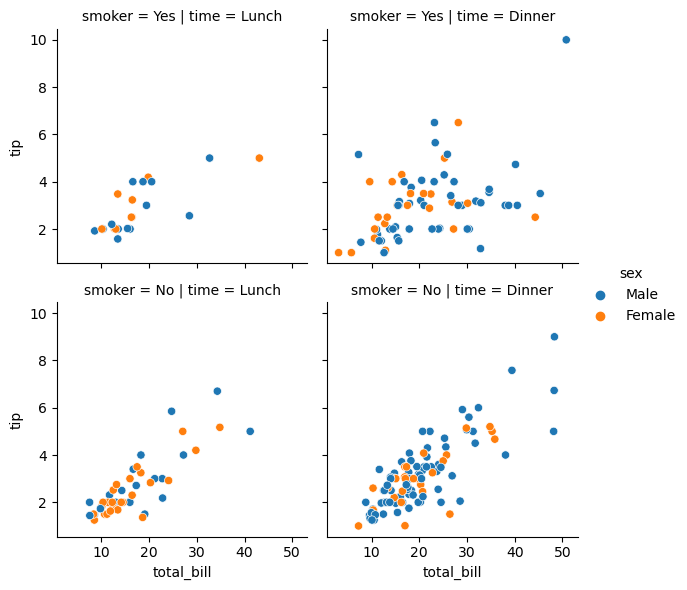

In [3]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter', hue = 'sex',
             col = 'time', row = 'smoker', height = 3)

### <a id = 'wrap'>col_wrap</a>
Sometimes, when we have many different levels of a variable (with level I mean, the total values a variable has. A boolean variable has two levels: `True` and `False`) we might want to 'wrap' this variable so that it spans into multiple rows.

In [4]:
attend = sns.load_dataset("attention").query("subject <= 12")
attend.head(6)

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0


In [5]:
num_subjects = max(attend.subject.value_counts().index)
print(f'The levels of the variable subject are {num_subjects}')

The levels of the variable subject are 12


Text(0.5, 1.1, 'flf: FacetGrid        alf: pointplot')

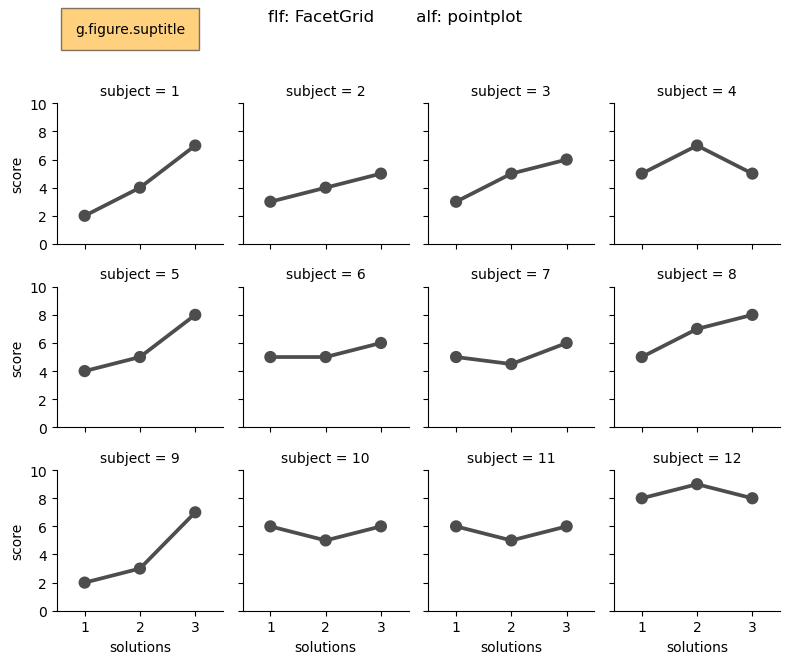

In [6]:
# col_wrap = 4. Each row will have 4 levels of the subject variable
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)
g.figure.text(0.1, 1.06, 'g.figure.suptitle', bbox={'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
g.figure.suptitle('flf: FacetGrid        alf: pointplot', y = 1.1)

## <a id = 'levelf'>Facet Grid & other Figure-Level functions</a>
This is the main function of all (except `Pair Grid`). It's like the father of the `flf`. It has a slightly way of plotting, but it plots (almost -we'll see later a tiny difference-) the same than its *childs*: `relplot()`, `distplot()` and `catplot()`.

Let's see an example

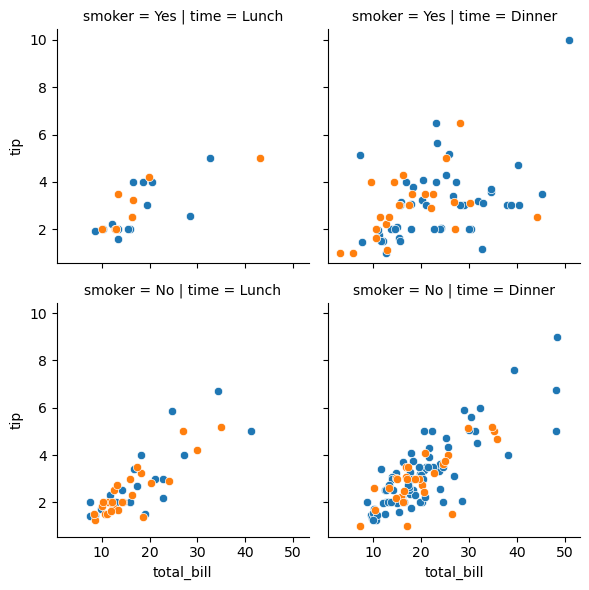

In [7]:
# Facet Grid
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker', hue = 'sex', height = 3) #hue could be in the next line
g.map_dataframe(sns.scatterplot, x = 'total_bill', y= 'tip')

Wait, but this is the same plot we plotted at the beginning of this notebook. Just without the legend.

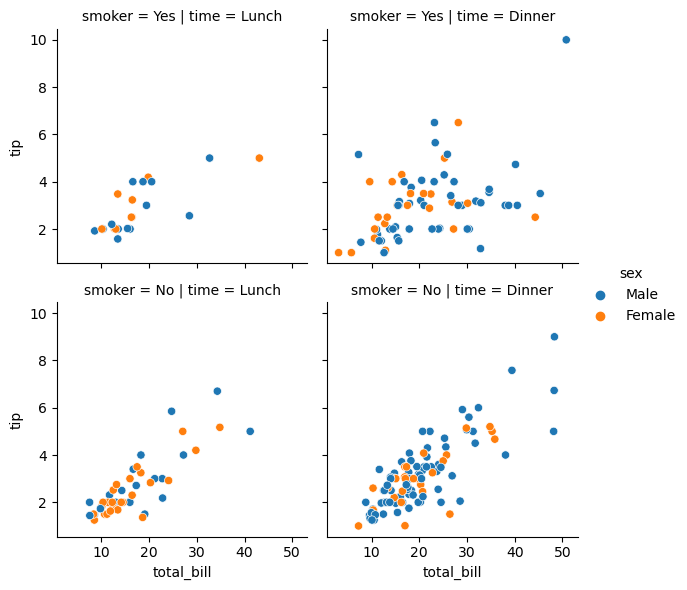

In [8]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter', hue = 'sex',
             col = 'time', row = 'smoker', height = 3)

Both ways to plot are fine, and  they will give you both the same results almost always. There are some tiny differences that are worth marking.
- **First**, the x and y variables are not declared in the `FacetGrid()` arguments. They are declared later with the `map` or `map_dataframe` function.

- **Second** is that they might not plot with the same size. Easy fix with `height` and `Aspect` attributes.

- **Third** is the legend. Using `FacetGrid()` you must set a legend. This is quite easy with `g.add_legend()`

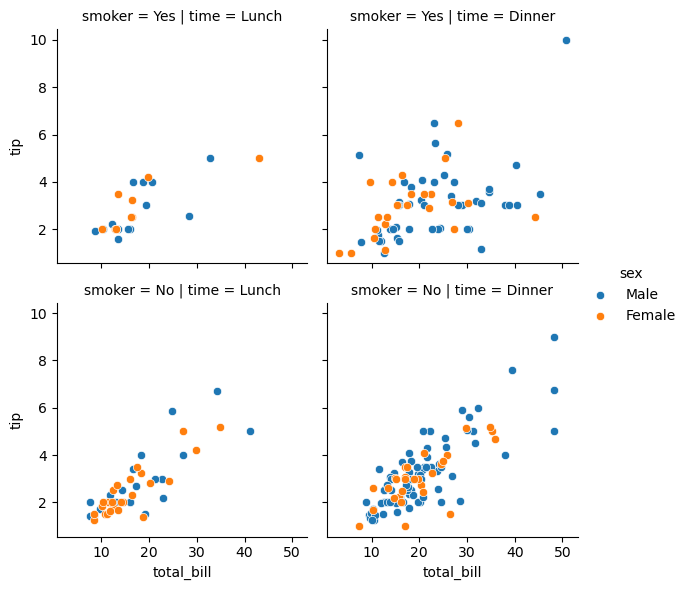

In [9]:
# Facet Grid
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker', hue = 'sex', height = 3) #hue could be in the next line
g.map_dataframe(sns.scatterplot, x = 'total_bill', y= 'tip')
g.add_legend()

- The **fourth** difference between using `FacetGrid()` with any of its *childs*: `relplot()`, `distplot()` and `catplot()` is that `FacetGrid()` is going to treat each subplot as a whole and the *childs* are going to have an entire perspective about all the subplots. This might be hard to understand at first but let's see an example: Imagine that in your dataset, you have 80% males and 20% females. And 50% of males and females play soccer. If you make two subplot dividing them by sex and plot the percentage that plays soccer:
    - `FacetGrid()` will see each subplot (sex) as a whole, and so will plot a 50%/%50 percentage  plot
    - `distplot()`, on the other hand, will have an entire perspective of the dataset and will plot that 40% of males play soccer (i.e 50% of the initial 80%), and 40% don't. And with female will plot that 10% do play soccer and the other 10% don't.
    - If you sum the percentages  of each subplot using `FacetGrid()`  you'll get 100%. If you sum the percentages of all the subplots using `displot()`, you'll get 100%.

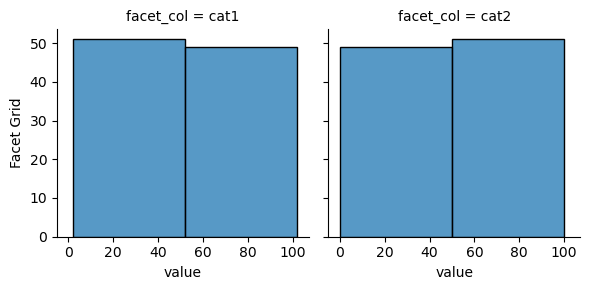

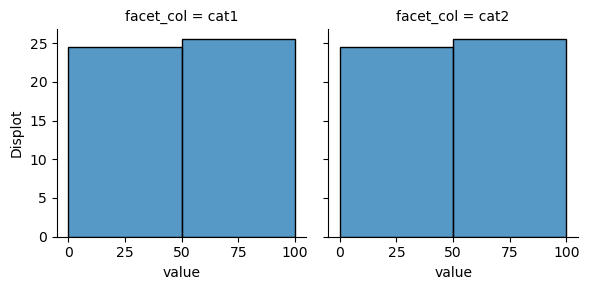

In [10]:
import numpy as np
import pandas as pd
# random data
np.random.seed(1001)
value_col = np.random.randint(100, size=200)
facet_col = np.repeat(['cat1','cat2'],100)
df = pd.DataFrame({'value':value_col, 'facet_col':facet_col})


#use FacetGrid 
g = sns.FacetGrid(df,col='facet_col', height = 3)
g.map_dataframe(sns.histplot, x="value",  stat='percent', binwidth=50)
g.set_ylabels('Facet Grid')


#use displot 
g = sns.displot(data=df,
            x='value',
            col='facet_col', stat='percent', binwidth=50, height = 3)
g.set_ylabels('Displot')

#### So we've seen that both ways of plotting are very similar. But why or how are they similar?
`relplot()`, `distplot()` and `catplot()` use `FacetGrid()` behind the scenes.

For example when we code

```python

sns.relplot(data = data, x = x, y = y, kind = 'scatter')
```
<br>

`relplot()`, behing us, is using a combination of `FacetGrid()` and `scatterplot()`.


- Another thing that you must know is that a `FacetGrid()` object is returned always. 

    - This means, we can apply the same functionality to whichever we decide to use.

In [11]:
sns.reset_defaults() # this line is to cancel %matplotlib inline so that this cell 
                     # doesn't plot anything, just the prints
g = sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter')
print(f'El tipo de objeto que devuelve relplot es {type(g)}')

g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker', hue = 'sex', height = 3)
print(f'El tipo de objeto que devuelve FacetGrid es {type(g)}')

El tipo de objeto que devuelve relplot es <class 'seaborn.axisgrid.FacetGrid'>
El tipo de objeto que devuelve FacetGrid es <class 'seaborn.axisgrid.FacetGrid'>


In [12]:
# I need to add again this functionality to be able to plot correctly
%matplotlib inline

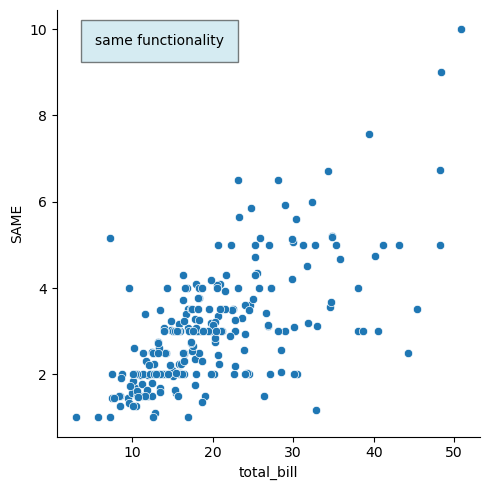

In [13]:
# they have the same functionality since it is the same object
g = sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'scatter')
g.figure.text(0.2, 0.9, 'same functionality', bbox={'facecolor': 'LightBlue', 'alpha': 0.5, 'pad': 10})
g.set_ylabels('SAME')

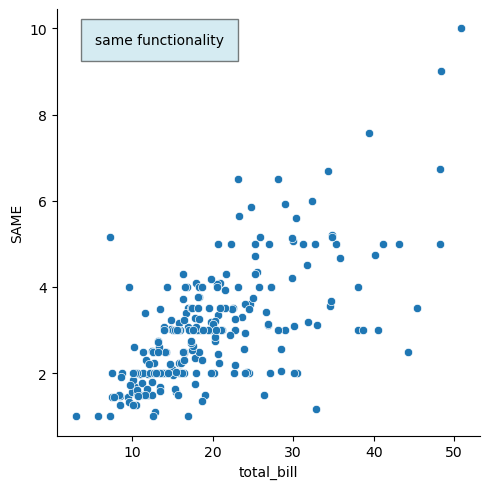

In [14]:
g = sns.FacetGrid(data = tips, height = 5)
g.map_dataframe(sns.scatterplot, x = 'total_bill', y = 'tip')
# same two lines
g.figure.text(0.2, 0.9, 'same functionality', bbox={'facecolor': 'LightBlue', 'alpha': 0.5, 'pad': 10})
g.set_ylabels('SAME')

All the methods and attributes you can pass to the `FacetGrid() class object` (**g** in our examples) can be found [here](https://seaborn.pydata.org/generated/seaborn.FacetGrid.htmln) in the *methods* and *attributes* section respectively.

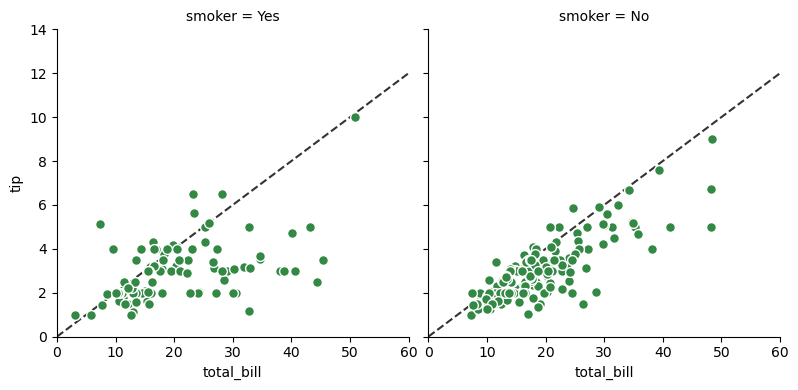

In [15]:
# One last example using g.axes_dict.values()

g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))

### <a id = 'qfn'>Quick final notes</a>
- The *FacetGrid class* is useful when you want to visualize the **distribution of a variable or the relationship between multiple variables separately** within subsets of your dataset. 
    - Notice that we can only plot one type of graph (either scatterplot or histogram or any other,  but **just one**.)


- I've used `g.map_dataframe()` in my `FacetGrid()` examples. In the documentation and external codes, you may see `g.map()` instead. They are the same, but sometimes `g.map()` complains  and gives you an error. In [this video](https://www.youtube.com/watch?v=V_a0-1lU4AU) you can see an example of what I mean.


- Even though the difference between using `FacetGrid()` or using `relplot()`, `distplot()` and `catplot()` is very subtle, unless you want to consider each subplot as a whole (which not always is going to be necessary), I'd use the latter: `flf`. I think they are easier to read and to understand for someone that sees your code for the first time.

## <a id = 'pg'>Pair Grid</a>

`PairGrid()` gives us a bit more flexibility when deciding which graph to plot. It resumes the relationship among different variables of our dataset in one matrix graph. 

In a `PairGrid`, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset.

It’s important to understand the differences between a `FacetGrid` and a `PairGrid`. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship.

Using `PairGrid` can give you a very **quick, very high-level summary of interesting relationships** in your dataset.

It is more flexible than `FacetGrid` because whereas `FacetGrid` only allows you to plot one type of graph, `PairGrid` allows one to plot up to 3 different graphs in one simple plot matrix:
- In the matrix upper triangle.
- In the matrix diagonal.
- In the matrix lower triangle.

The usage of `PairGrid` is very similar to `FacetGrid` with some more methods that allow the extra flexibility that we just mentioned.

In [16]:
iris = sns.load_dataset("iris")
iris.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


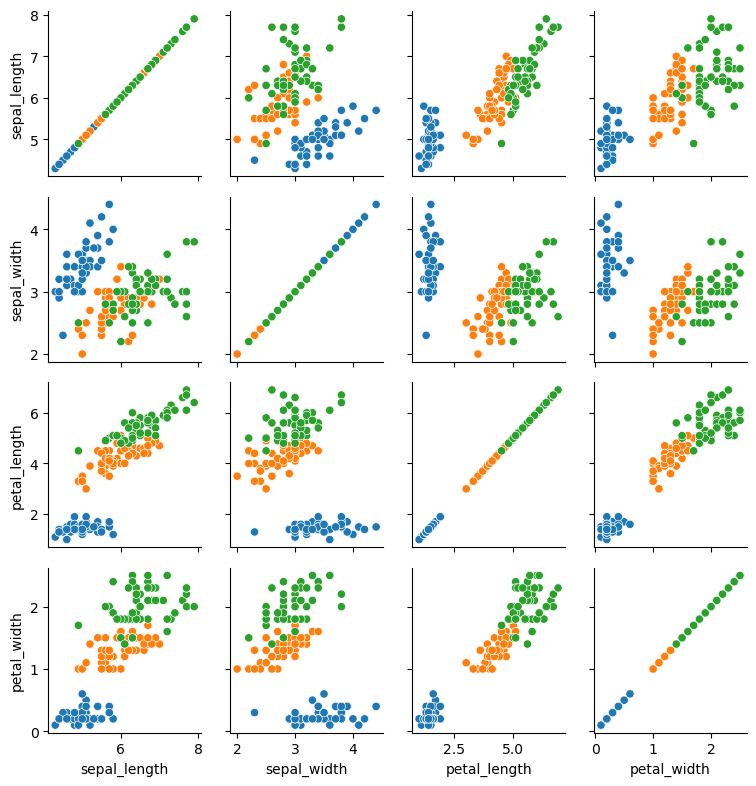

In [17]:
g = sns.PairGrid(iris, hue = 'species', height = 2)
g.map(sns.scatterplot)

>**Note**: It is important to notice that the upper and lower triangles are mirrors of each other: `matrix[i,j] = matrix[j,i]`

In other words, the above plot is showing redundant information. There are a few things we can do if we wanted to change this.

1. Not showing either the upper or lower traingle. But make sure to use **different plots** for the diagonal than for the (upper or lower) triangle.

>ChatGPT response: The map_diag method is intended to apply a different plotting function to the diagonal subplots. In your case, you are using sns.scatterplot for both map_lower and map_diag. This might be causing the issue.

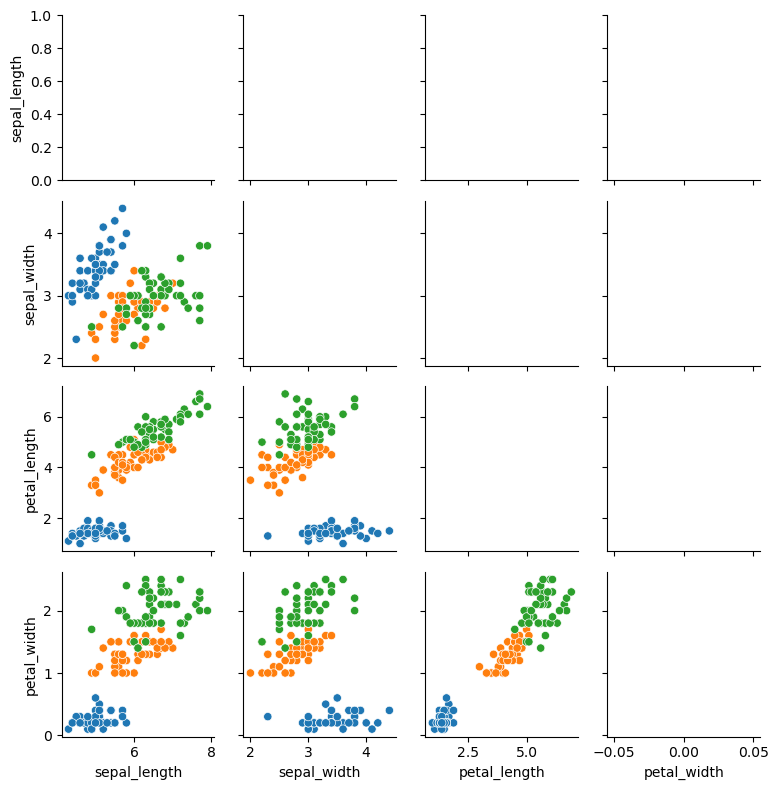

In [18]:
# using the same plot for lower triangle and diagonal results is not plotting anything in the diagonal
g = sns.PairGrid(iris, hue = 'species', height = 2)
g.map_lower(sns.scatterplot)
g.map_diag(sns.scatterplot)

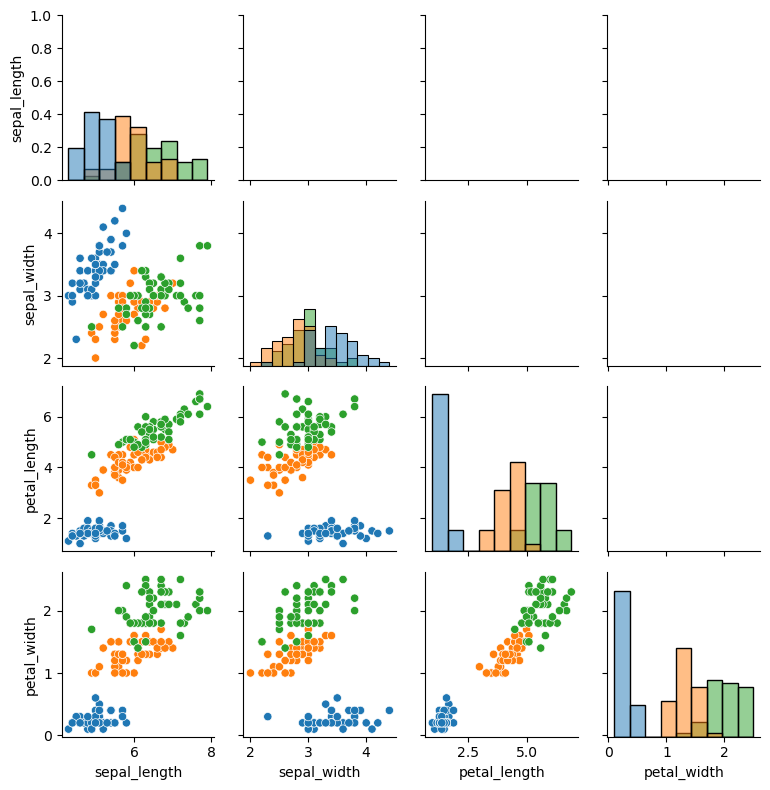

In [19]:
#using different plot for diagonal and lower triangle. Now it plots in the diagonal
g = sns.PairGrid(iris, hue = 'species', height = 2)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

2. Plotting different graphs in both upper and lower triangle

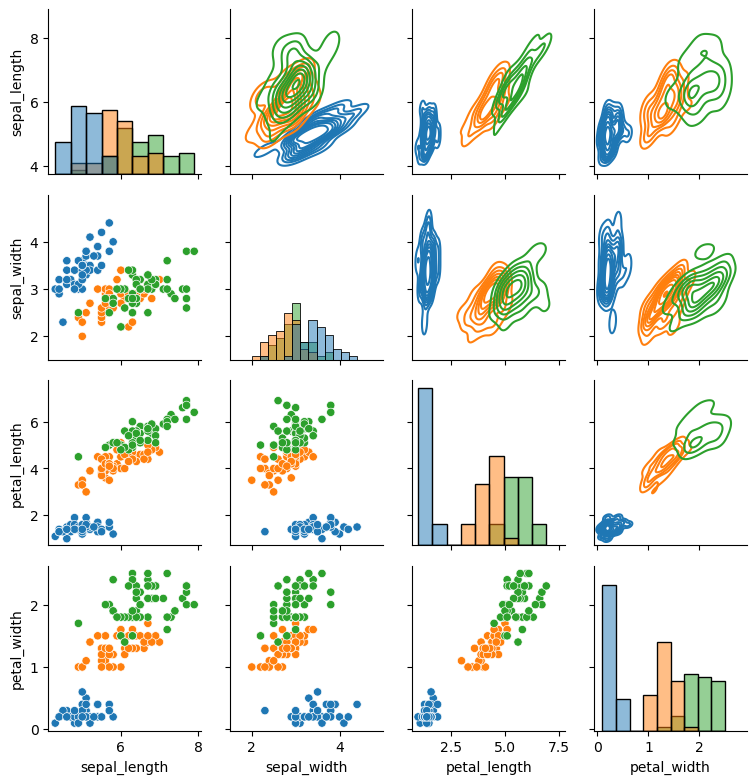

In [20]:
g = sns.PairGrid(iris, hue = 'species', height = 2)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

You can also plot multiple graphs in a single plot

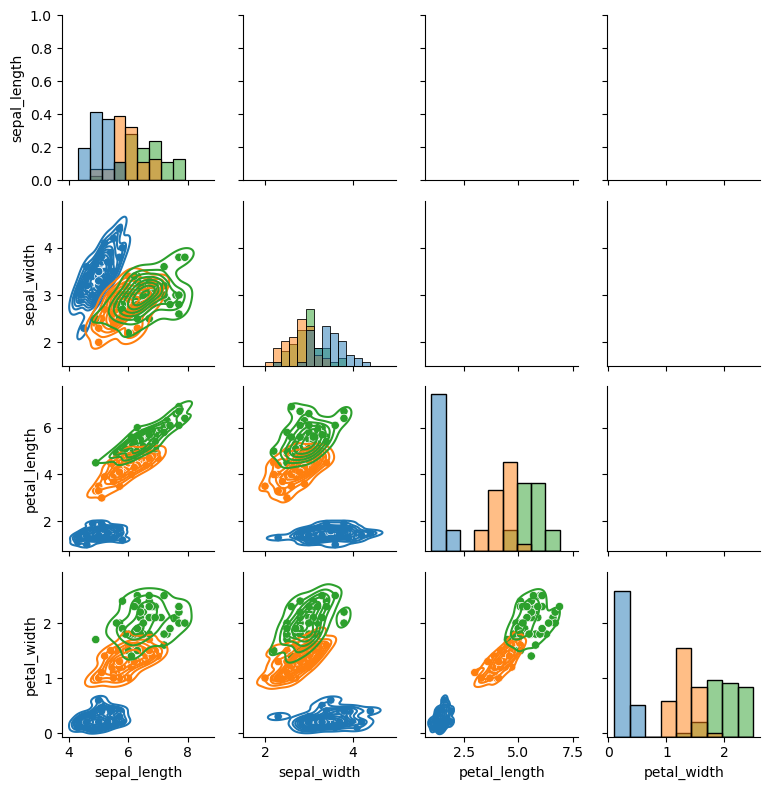

In [21]:
g = sns.PairGrid(iris, hue = 'species', height = 2)
g.map_lower(sns.kdeplot, color = '.2')
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

There are other methods that might be helpful in some situations

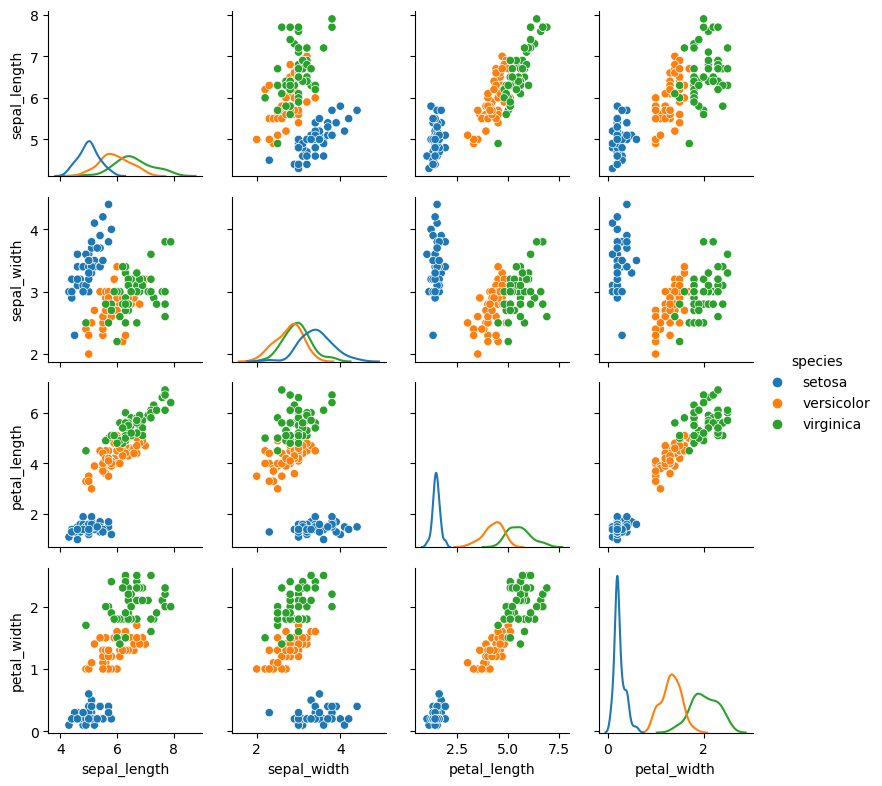

In [22]:
# map_offdiag. Same plot for upper and lower triangle
g = sns.PairGrid(iris, hue = 'species', height = 2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Finally you can set only the variables you are intersted in

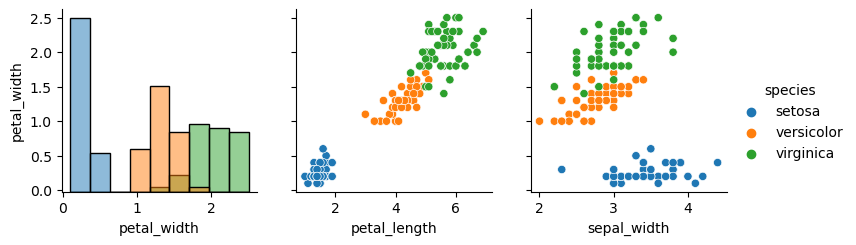

In [23]:
x_vars = ["petal_width", "petal_length", "sepal_width"]
y_vars = ["petal_width"]
g = sns.PairGrid(iris, hue="species", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

You can find more examples in the [PairGrid documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).

>**Note**: PairGrid is a `flf` function. It has a *child*, a `alf` called `pairplot()`. It's is the same with the limitations of an `alf` seen in the last notebook. I think it is a good practice to only use `PairGrid` instead of `pairplot()` and that's why I am **not going to explain** `pairplot()`. I leave here the [pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) in case you want to check it out.

## <a id = 'matp'>Subplotting with matplotlib</a>
Here comes probably the most ironic topic *Seaborn* has. And we said that the only way to make subplots is by using a `flf` like `FacetGrid`, `PairGrid`, `relplot`, etc. 

But the most flexibility we can get when plotting subplots is by using `alf` with *Matplotlib*. This way of plotting is more sophisticated because we need to plot subplot by subplot. The good thing is that this gives us an **entire customization**. 

Until now, `PairGrid` has been the most flexible way to plot subplots, allowing us, the programmers, to decide up to 3 different plots in an entire plot of subplots (upper diagonal, diagonal and lower diagonal).

This way of plotting -`alf` + *Matplotlib*-, gives us an entire flexibility. We can decide as many different graphs to plot as we want. 

We are only going to see one example, but I think it is more than enough to get the idea.

In [24]:
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex', ylabel='size'>

<Figure size 640x480 with 0 Axes>

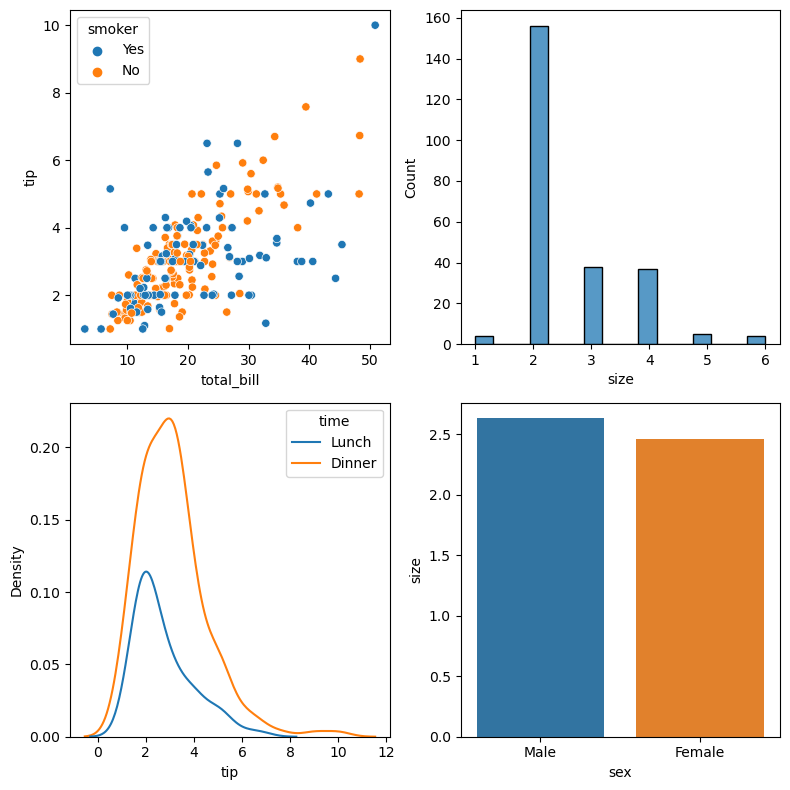

In [25]:
fig = plt.figure()
fig, ax = plt.subplots(2,2, figsize = (8,8), tight_layout = True)
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', ax = ax[0,0])
sns.histplot(data = tips, x = 'size', ax = ax[0,1])
sns.kdeplot(data = tips, x = 'tip', hue = 'time', ax = ax[1,0])
sns.barplot(data = tips, x = 'sex', y = 'size', ax = ax[1,1], ci = None)

>**Note**: `ci = None` is deprecated in new versions of seaborn. Use `errorbar = None` if you get an error.

<p style="text-align:center"><b>This notebook has been done by:</b></p>
<p style="text-align:center"><i>Javier Coque</i></p>
<p style="text-align:center"><i>University of U-tad Double Degree in software engineering and computational mathematics</i></p>

LinkedIn: <a href="https://www.linkedin.com/in/javier-coque-92b934278/">Javier Coque</a>